# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

### Vipin Selvaraj P V

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>



What is the impact of the Socio economic factors to Crime rates in different suburbs in London?

I have been a resident of London for the last 16 years. Over a period of time, I have been watching the socio economic changes happening in London and also observing the increasing crime rates in different suburbs in London. I undertake the opportunity to analyse how the fluctuation in socio economic factors affect the crime rates in different suburbs in London.  

London is a densily populated city with 8.85 million people in 2018. It is an ever growing city and as per the Office for National Statistics (ONS)London could on average grow by some 117,000 pa to 9.37 mll in 2021. As expected, this has an impact on socio economic landscape with increasing pressure on Government to ingest funds to maintain the quality of life in London. With the confusions over the Brexit looming over the future of UK, and funding cuts affecting the Police, NHS and local government initiatives including the social care, it has become challenging for many boroughs to control the crime rates down. 

There are 33 boroughs in London each of which have different characteristics and governance. They are categorised as inner boroughs and outer boroughs. This analysis is based on the socio economic changes occured in these 33 bouroughs in the last decade and its impact on the crime rates in those aeas. 

The factors considered are as follows:

* Population density and degree of urbanization
  
* Housing
    * Affordability
    * Number of Homeless people 
    * People on housing benefits 
* Poverty 
    * Number of People of Benefits 
    * Number of people below poverty line
* Social Care 
    * School Funding 
    * Parks 
    * Recreational facilities 
* Family conditions with respect to divorce and family cohesiveness.
    * Lone families 
* Unempleyment 
    * Number of unemployed people
    * Number of people not employable 
* Effective strength of law enforcement agencies.
    * Reduction in Police Community Support Officers (PCSO)
* Education
    * Performance of the schools 
    * Dropouts
    * People are not pursuing to further education after school
* NHS (National Health Service) - Medical facilities and the financial challenges 
    * Average waiting time 
    * Operations cancelled 
* Youth service budget cuts and closures
    * Number of units closed 
* Variations in composition of the population, particularly youth concentration.
    * Counts on the different ethinicity of the population 
* Stability of the population with respect to residents’ mobility, commuting patterns, and transient factors.
* Modes of transportation and highway system.
    * Connectivity to railways and highwayes 
* Cultural factors and educational, recreational, and religious characteristics.
    * Number of recreational facilities 
* Administrative and investigative emphases of law enforcement.
* Citizens’ attitudes toward crime.
* Crime reporting practices of the citizenry

## Data <a name="data"></a>

Based on the definition of the problems, the following are the main factors affecting the crime rates in the bouroughs of London. 

* Economic Factors which would have impact on crime rates 
      1. Fund allocation to each 'Borough' of London
      2. Child Poverty Rate 
      3. Imcome deprieved families 
     
* Social Factors which would have impact on crime rates  
      1. Unemployment percentage
      2. Work Benefit percentage 
      3. Lone Parents
      4. School Exclusions
      5. Affordable Housing
      
These factors are scientifically analysed as part of the project.   
    
### Data Sources 

The data for analysing the issue - 'What is the impact of the Socio economic factors to Crime rates in different suburbs in London?' is mainly coming from the following sources. 

1. https://data.london.gov.uk
2. https://www.trustforlondon.org.uk/data/
3. https://www.ons.gov.uk
4. https://www.met.police.uk
5. https://www.gmblondon.org.uk
6. https://en.wikipedia.org

The map coordinate data are taken from 
1. https://foursquare.com

The factors considered are as follows:

The major data sets used for the analysis are as follows:
 

### List of London Boroughs 

As the first step, map of  London is plotted using Folium

In [1]:
# Source : https://data.london.gov.uk/dataset/london-borough-profiles
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import folium
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from sklearn import preprocessing
london_map = folium.Map(location=[51.509865, -0.118092], zoom_start = 11)

import seaborn as sns
london_map



London Boroughs are extracted from source given

In [78]:
# Source : https://data.london.gov.uk/dataset/london-borough-profiles

df = pd.read_excel('./Downloads/notebook/london-borough-profiles.xlsx', sheet_name='Data', skiprows=0)
df.dropna(subset=['Inner/ Outer London'], inplace=True)

df= df[['New code','Area name', 'Inner/ Outer London']]
df.rename(columns={'New code': 'ONS_Code', 'Area name': 'Borough','Inner/ Outer London':'Inner_Outer' }, inplace =True)
df.head()

,ONS_Code,Borough,Inner_Outer
1,E09000001,City of London,Inner London
2,E09000002,Barking and Dagenham,Outer London
3,E09000003,Barnet,Outer London
4,E09000004,Bexley,Outer London
5,E09000005,Brent,Outer London


### Population Density in London Boroughs

In [80]:
# https://data.london.gov.uk/dataset/land-area-and-population-density-ward-and-borough

df_pop = pd.read_excel('./Downloads/notebook/land-area-population-density-london.xls', sheet_name='Borough',skiprows =1,  index_col=None, na_values=['NA'], usecols = "A,A:L", nrows= 34)
df_pop.dropna(subset=['Area name'], inplace=True)
df_pop.head()


,Code,Area name,Inner/ Outer London,GLA Population estimate/ projection,Inland Area (Hectares),Total Area (Hectares),Population per hectare,Square Kilometres,Population per square kilometre,Unnamed: 9,Census population (2011),Population per hectare.1
1,E09000001,City of London,Inner,7681.0,290.3934,314.9383,26.450326,2.903934,2645.032566,NaN,7400.0,25.482673
2,E09000002,Barking and Dagenham,Outer,212773.0,3610.7817,3779.9330,58.927129,36.107817,5892.712927,NaN,185900.0,51.484697
3,E09000003,Barnet,Outer,397049.0,8674.8314,8674.8314,45.770227,86.748314,4577.022673,NaN,356400.0,41.084372
4,E09000004,Bexley,Outer,249999.0,6058.0668,6428.5879,41.267125,60.580668,4126.712502,NaN,232000.0,38.296045
5,E09000005,Brent,Outer,336859.0,4323.2637,4323.2637,77.917755,43.232637,7791.775459,NaN,311200.0,71.982655


### London Crime Rate History

Here crime rates of London Boroughs are extracted. 

In [81]:
# Import the Crime Rate History Data 
# https://data.london.gov.uk/dataset/recorded_crime_rates

df_crime = pd.read_excel('./Downloads/notebook/met-police-recorded-offences-rates-borough.xlsx', sheet_name='Recorded Offences',skiprows =1,  index_col=None, na_values=['NA'],  nrows= 34)
df_crime.dropna(subset=['Borough'], inplace=True)
df_crime.set_index('Borough', inplace =True)
df_crime.sort_values(['Borough'], ascending = True, axis=0, inplace=True)
df_crime.rename(columns={'2016-17': 'Crime_Rate' }, inplace =True)
df_crime_2016_17 = df_crime[['Crime_Rate']]
df_crime_2016_17.head()

,Crime_Rate
Borough,
Barking and Dagenham,14638.0
Barnet,21549.0
Bexley,11163.0
Brent,23237.0
Bromley,17243.0


Crime rates of London Boroughs are plotted 

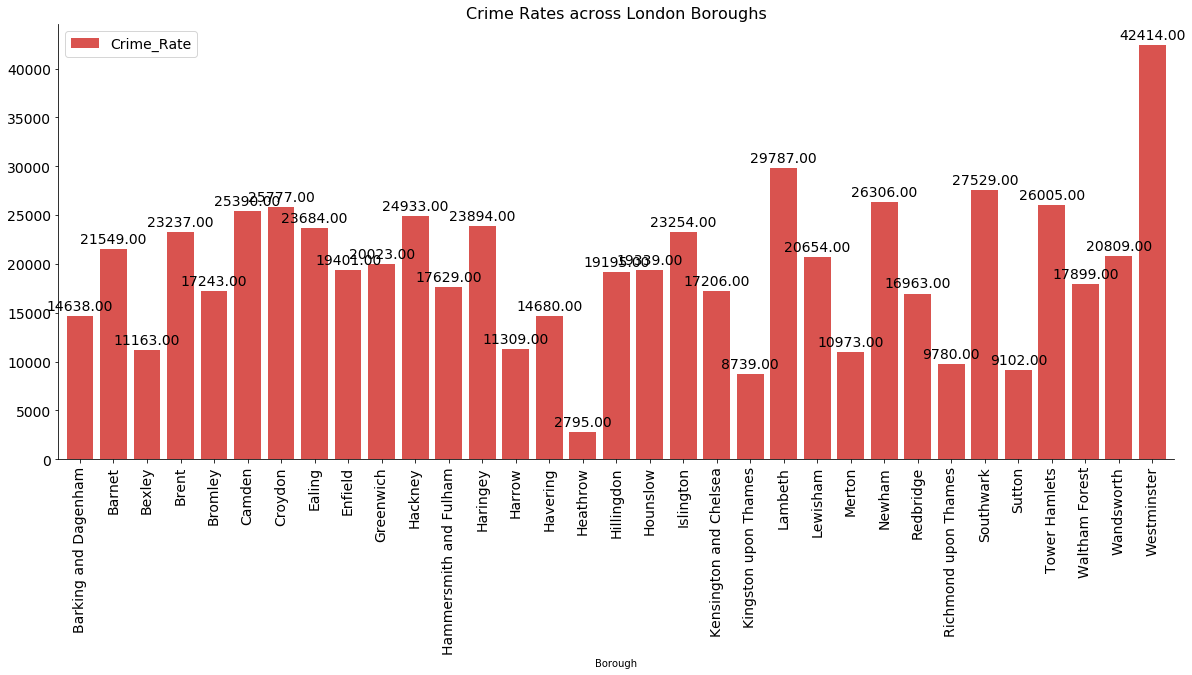

In [82]:
colors_list = ['#d9534f' ]
ax = df_crime_2016_17.plot(kind ='bar', fontsize = 14, color = colors_list, figsize=(20,8), width =0.8)
#ax = df.plot.bar(title="Scores")
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize =14)

plt.title('Crime Rates across London Boroughs', fontsize = 16)
plt.legend(fontsize =14)
#plt.xticks['123']
#plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
#plt.gca().spines['left'].set_color('none')
plt.gca().spines['right'].set_color('none')

plt.show()

In [83]:


london_geo= r'./Downloads/notebook/london_boroughs_proper.geojson'

london_map = folium.Map(location=[51.509865, -0.118092], zoom_start = 10)
london_map.choropleth(
    geo_data=london_geo,
    data=df_crime_2016_17["Crime_Rate"],
    columns=["Borough",'Crime_Rate'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime Rate in London',
    highlight=True
)

london_map

Here is the heat map of the crime rates across London Boroughs

Here we start the extraction of data of each factor which could affect the crime rate. 

### Poverty Rate 

Here poverty rates of each London Borough is extracted


In [84]:
# Import Poverty Data 
# https://www.trustforlondon.org.uk/data/child-poverty-borough/

df_child_poverty = pd.read_csv('./Downloads/notebook/child-poverty-rates-by-borough.csv',delimiter=',' )
df_child_poverty.dropna(subset=['Child poverty rates by borough'], inplace=True)
df_child_poverty.rename(columns={'Child poverty rates by borough': 'Borough', 'Unnamed: 1': 'Child_Poverty_Rate' }, inplace =True)
df_child_poverty.set_index('Borough', inplace =True)
df_child_poverty["Child_Poverty_Rate"] = df_child_poverty["Child_Poverty_Rate"].replace({'%':''}, regex = True)
df_child_poverty["Child_Poverty_Rate"] = pd.to_numeric(df_child_poverty["Child_Poverty_Rate"])
df_child_poverty.dropna(subset=['Child_Poverty_Rate'], inplace=True)

df_child_poverty.sort_values(['Borough'], ascending = True, axis=0, inplace=True)

df_child_poverty.head()



,Child_Poverty_Rate
Borough,
Barking and Dagenham,36.57
Barnet,26.60
Bexley,24.72
Brent,32.04
Bromley,21.44


<function matplotlib.pyplot.plot(*args, **kwargs)>

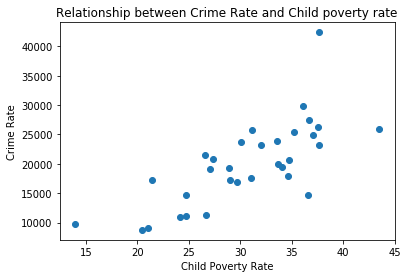

In [85]:
df_crime_details1 = pd.merge(df_crime_2016_17, df_child_poverty, how='left', on=['Borough'])
df_crime_details1.head()
plt.scatter( df_crime_details1.Child_Poverty_Rate, df_crime_details1.Crime_Rate)
plt.ylabel("Crime Rate")
plt.xlabel("Child Poverty Rate")
plt.title("Relationship between Crime Rate and Child poverty rate")
plt.plot

### Outof work Benefits 

Here out of work benefit percentage of each London Borough is extracted

In [86]:
# https://www.trustforlondon.org.uk/data/out-work-benefits-borough/

df_work_benefits = pd.read_csv('./Downloads/notebook/proportion-of-working-age-population-receiving-out-of-work-benefits.csv',delimiter=',' )
df_work_benefits.columns = ['Borough', 'Work_Benefit_Per']
df_work_benefits.dropna(subset=['Work_Benefit_Per'], inplace=True)
df_work_benefits.set_index('Borough', inplace =True)
df_work_benefits["Work_Benefit_Per"] = df_work_benefits["Work_Benefit_Per"].replace({'%':''}, regex = True)
df_work_benefits["Work_Benefit_Per"] = pd.to_numeric(df_work_benefits["Work_Benefit_Per"])
df_work_benefits.dropna(subset=['Work_Benefit_Per'], inplace=True)
df_work_benefits
df_work_benefits.sort_values(['Borough'], ascending = True, axis=0, inplace=True)

df_work_benefits.head()


,Work_Benefit_Per
Borough,
Barking and Dagenham,10.0
Barnet,5.9
Bexley,6.5
Brent,7.8
Bromley,6.0


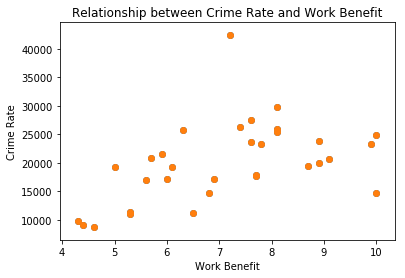

In [87]:

df_crime_details2 = pd.merge(df_crime_details1, df_work_benefits[['Work_Benefit_Per']], how='left', on=['Borough'])
df_crime_details2.head()
plt.scatter( df_crime_details2.Work_Benefit_Per, df_crime_details2.Crime_Rate)
plt.ylabel("Crime Rate")
plt.xlabel("Work Benefit")
plt.title("Relationship between Crime Rate and Work Benefit")
plt.plot

x = df_crime_details2.Work_Benefit_Per
y = df_crime_details2.Crime_Rate

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.scatter(x, y)
plt.plot(x, m * x + b, color="red")   # I've added a color argument here
plt.show()


### Unemployement Rates 

Here unemployment percentage of each London Borough is extracted

In [88]:
# https://www.gmblondon.org.uk/news/16-boroughs-in-london-have-employment-rate-below-uk-average.html

df_empl_rate = pd.read_excel('./Downloads/notebook/Borough_Employment_Rate.xlsx',  index_col=None, na_values=['NA'])
df_empl_rate.set_index('Borough', inplace =True)
df_empl_rate['Per_Un_Emloyd'] = 100 - df_empl_rate['Percentage']
df_empl_rate.sort_values(['Borough'], ascending = True, axis=0, inplace=True)

df_un_empl_rate = df_empl_rate[['Per_Un_Emloyd']]
df_un_empl_rate.head()

,Per_Un_Emloyd
Borough,
Barking and Dagenham,34.2
Barnet,27.6
Bexley,24.0
Brent,32.5
Bromley,21.0


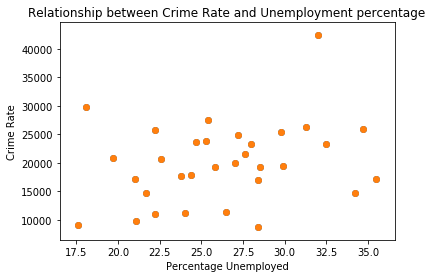

In [89]:
df_crime_details3 = pd.merge(df_crime_details2, df_un_empl_rate[['Per_Un_Emloyd']], how='left', on=['Borough'])

plt.scatter( df_crime_details3.Per_Un_Emloyd, df_crime_details3.Crime_Rate)
plt.ylabel("Crime Rate")
plt.xlabel("Percentage Unemployed")
plt.title("Relationship between Crime Rate and Unemployment percentage")
plt.plot

x = df_crime_details3.Per_Un_Emloyd
y = df_crime_details3.Crime_Rate

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.scatter(x, y)
plt.plot(x, m * x + b, color="red")   # I've added a color argument here
plt.show()



### Family Issues 

Here number of lone families with children of each London Borough is extracted

In [90]:
# https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/families/adhocs/009528loneparentswithdependentchildrenlondonboroughsandengland2016

df_lone_par = pd.read_excel('./Downloads/notebook/loneparentswithdependentchildrenlondonboroughsandenglandtotal2016final.xls',skiprows =3 , index_col=None, na_values=['NA'], nrows=32)
df_lone_par.rename(columns={'Local Authority': 'Borough' }, inplace =True)
df_lone_par.rename(columns={'Estimated number of lone parents': 'Lone_Parents' }, inplace =True)
df_lone_par.set_index('Borough', inplace =True)
df_lone_par.head()




,Lone_Parents
Borough,
Barking and Dagenham,8700
Barnet,9700
Bexley,7500
Brent,8800
Bromley,10000


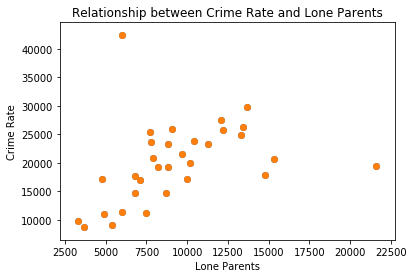

In [91]:

df_crime_details4 = pd.merge(df_crime_details3, df_lone_par[['Lone_Parents']], how='left', on=['Borough'])
plt.scatter( df_crime_details4.Lone_Parents, df_crime_details4.Crime_Rate)
plt.ylabel("Crime Rate")
plt.xlabel("Lone Parents")
plt.title("Relationship between Crime Rate and Lone Parents")
#plt.plot


x = df_crime_details4.Lone_Parents
y = df_crime_details4.Crime_Rate

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.scatter(x, y)
plt.plot(x, m * x + b, color="red")   # I've added a color argument here
plt.show()


### London Youth services 

Here fund reduction for youth services of each London Borough is extracted

In [92]:
# https://www.london.gov.uk/sites/default/files/london_lost_youth_services_sian_berry_jan2017.pdf

df_youth_funds = pd.read_excel('./Downloads/notebook/Borough_Funds_Allocation.xlsx',  index_col=None, na_values=['NA'], nrows = 34)
df_youth_funds.set_index('Borough', inplace =True)
df_youth_funds.rename(columns={'per_reduction': 'Fund_Red_Per' }, inplace =True)

df_youth_funds_red = df_youth_funds[['Fund_Red_Per']]
df_youth_funds_red.head()



,Fund_Red_Per
Borough,
Newham,81.018455
Hillingdon,71.548798
Havering,68.181818
Barking and Dagenham,67.710611
Waltham Forest,66.917858


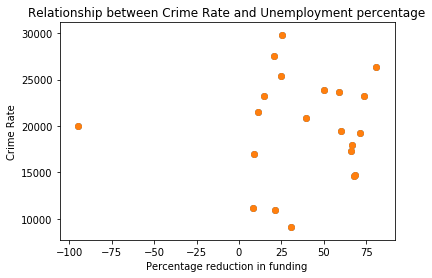

In [93]:

df_crime_details5 = pd.merge(df_crime_details4, df_youth_funds_red[['Fund_Red_Per']], how='left', on=['Borough'])
plt.scatter( df_crime_details5.Fund_Red_Per, df_crime_details5.Crime_Rate)
plt.ylabel("Crime Rate")
plt.xlabel("Percentage reduction in funding")
plt.title("Relationship between Crime Rate and Unemployment percentage")
plt.plot

x = df_crime_details5.Fund_Red_Per
y = df_crime_details5.Crime_Rate

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.scatter(x, y)
plt.plot(x, m * x + b, color="red")   # I've added a color argument here
plt.show()



### Income deprived households

Here percentage of income deprived households of each London Borough is extracted

In [94]:
# http://www.intelligentlondon.org.uk/borough_insight

df_dprv_hholds = pd.read_csv('./Downloads/notebook/income_deprived_households.csv',delimiter=',' )
df_dprv_hholds.rename(columns={'area': 'Borough', '2011': 'Income_Depr_Per'}, inplace =True)
df_dprv_hholds.set_index('Borough', inplace=True)
df_dprv_hholds_per =df_dprv_hholds[['Income_Depr_Per']]
df_dprv_hholds_per.head()

,Income_Depr_Per
Borough,
Barking and Dagenham,40.4
Barnet,23.2
Bexley,19.7
Brent,39.3
Bromley,17.5


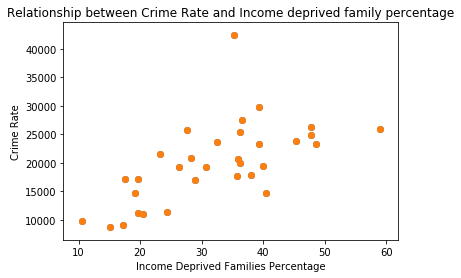

In [95]:
df_crime_details6 = pd.merge(df_crime_details5, df_dprv_hholds_per[['Income_Depr_Per']], how='left', on=['Borough'])
plt.scatter( df_crime_details6.Income_Depr_Per, df_crime_details6.Crime_Rate)
plt.ylabel("Crime Rate")
plt.xlabel("Income Deprived Families Percentage")
plt.title("Relationship between Crime Rate and Income deprived family percentage")
plt.plot

x = df_crime_details6.Income_Depr_Per
y = df_crime_details6.Crime_Rate

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.scatter(x, y)
plt.plot(x, m * x + b, color="red")   # I've added a color argument here
plt.show()

### Education

Here percentage of exclusion of students in each London Borough is extracted

In [96]:
# https://data.london.gov.uk/dataset/permanent-exclusions-school-borough

df_perm_excl = pd.read_excel('./Downloads/notebook/permanent-exclusions-from-school.xls', sheet_name='2016-17',skiprows =1 , index_col=None, na_values=['NA'], nrows =34)
df_perm_excl.dropna(subset=['Area'], inplace=True)
df_perm_excl.rename(columns={'Number of permanent exclusions.3': 'School_Excl_Per'}, inplace =True)

df_perm_excl.rename(columns={'Area': 'Borough' }, inplace =True)
df_perm_excl.set_index('Borough', inplace =True)
df_perm_excl_nums = df_perm_excl[['School_Excl_Per']]
df_perm_excl_nums.head()



,School_Excl_Per
Borough,
City of London,0.0
Barking and Dagenham,29.0
Barnet,44.0
Bexley,34.0
Brent,36.0


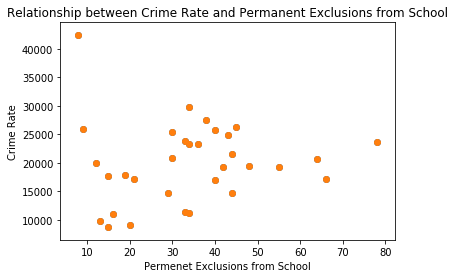

In [97]:
df_crime_details7 = pd.merge(df_crime_details6, df_perm_excl_nums[['School_Excl_Per']], how='left', on=['Borough'])
plt.scatter( df_crime_details7.School_Excl_Per, df_crime_details7.Crime_Rate)
plt.ylabel("Crime Rate")
plt.xlabel("Permenet Exclusions from School")
plt.title("Relationship between Crime Rate and Permanent Exclusions from School")
plt.plot
x = df_crime_details7.School_Excl_Per
y = df_crime_details7.Crime_Rate

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.scatter(x, y)
plt.plot(x, m * x + b, color="red")   # I've added a color argument here
plt.show()


### Affordable Housing 

Here number of affordable houseing in each London Borough is extracted


In [98]:
# Import the Affordable housing data 
# https://data.london.gov.uk/dataset/dclg-affordable-housing-supply-borough

df_housing = pd.read_excel('./Downloads/notebook/dclg-affordable-housing-borough.xls', sheet_name='data',  index_col=None, na_values=['NA'], nrows= 34)
df_housing.dropna(subset=['Area name'], inplace=True)
df_housing.rename(columns={'Area name': 'Borough','2016-17' :'Aff_Housing' }, inplace =True)
df_housing.set_index('Borough', inplace =True)
df_housing_nums = df_housing[['Aff_Housing']]
df_housing_nums.head()

,Aff_Housing
Borough,
City of London,0.0
Barking and Dagenham,59.0
Barnet,320.0
Bexley,69.0
Brent,226.0


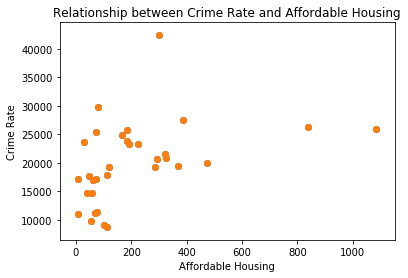

In [99]:
df_crime_details8 = pd.merge(df_crime_details7, df_housing_nums[['Aff_Housing']], how='left', on=['Borough'])
plt.scatter( df_crime_details8.Aff_Housing, df_crime_details8.Crime_Rate)
plt.ylabel("Crime Rate")
plt.xlabel("Affordable Housing")
plt.title("Relationship between Crime Rate and Affordable Housing")
plt.plot

x = df_crime_details8.Aff_Housing
y = df_crime_details8.Crime_Rate

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.scatter(x, y)
plt.plot(x, m * x + b, color="red")   # I've added a color argument here
plt.show()

### Data Frame of crime data created from all data sources

In [100]:
df_crime_details8.reset_index(inplace =True)
df_crime_details8.head()

,Borough,Crime_Rate,Child_Poverty_Rate,Work_Benefit_Per,Per_Un_Emloyd,Lone_Parents,Fund_Red_Per,Income_Depr_Per,School_Excl_Per,Aff_Housing
0,Barking and Dagenham,14638.0,36.57,10.0,34.2,8700.0,67.710611,40.4,29.0,59.0
1,Barnet,21549.0,26.60,5.9,27.6,9700.0,11.503570,23.2,44.0,320.0
2,Bexley,11163.0,24.72,6.5,24.0,7500.0,8.474576,19.7,34.0,69.0
3,Brent,23237.0,32.04,7.8,32.5,8800.0,73.542164,39.3,36.0,226.0
4,Bromley,17243.0,21.44,6.0,21.0,10000.0,65.928440,17.5,66.0,74.0


In [101]:
df_crime_info = df_crime_details8.copy()
df_crime_info_master = df_crime_details8.copy()

## Methodology <a name="methodology"></a>

In this project, the whole focus is given in identifying the major factors affecting the crime rates in London, based on the data associated with different boroughs. 

Here are the steps adopted to anlayse the issue 
 
     * Step 1 :- Indentify the optimum clusters for K Means
     * Step 2 :- With K-means analysing each factor with the crime rate 
                 Here the following factors are analysed against the crime rate. 
                     1. Fund allocation to each 'Borough' of London
                     2. Child Poverty Rate 
                     3. Imcome deprieved families 
                     4. Unemployment percentage
                     5. Work Benefit percentage 
                     6. Lone Parents
                     7. School Exclusions
                     8. Affordable Housing
                 
     * Step 3 :- Compare the results from step 2 with 'Pearson Correlation' results 
     * Step 4 :- Conclude the results 


## Analysis <a name="analysis"></a>

### Step 1 

Here we start the analysis with identification of optimum number of clusters using elbow method

### Applying K Means 

In [102]:

#y = df_crime_details8['crime_rate'].values
#y

df_crime_info.replace(np.nan, 0, inplace=True)
#df_crime_info.drop(['Borough'], axis =1, inplace =True)

df_crime_info

,Borough,Crime_Rate,Child_Poverty_Rate,Work_Benefit_Per,Per_Un_Emloyd,Lone_Parents,Fund_Red_Per,Income_Depr_Per,School_Excl_Per,Aff_Housing
0,Barking and Dagenham,14638.0,36.57,10.0,34.2,8700.0,67.710611,40.4,29.0,59.0
1,Barnet,21549.0,26.60,5.9,27.6,9700.0,11.503570,23.2,44.0,320.0
2,Bexley,11163.0,24.72,6.5,24.0,7500.0,8.474576,19.7,34.0,69.0
3,Brent,23237.0,32.04,7.8,32.5,8800.0,73.542164,39.3,36.0,226.0
4,Bromley,17243.0,21.44,6.0,21.0,10000.0,65.928440,17.5,66.0,74.0
5,Camden,25390.0,35.18,8.1,29.8,7700.0,24.602860,36.3,30.0,74.0
6,Croydon,25777.0,31.17,6.3,22.2,12200.0,0.000000,27.6,40.0,186.0
7,Ealing,23684.0,30.06,7.6,24.7,7800.0,59.243760,32.5,78.0,29.0
8,Enfield,19401.0,34.06,8.7,29.9,21600.0,60.164927,39.9,48.0,370.0
9,Greenwich,20023.0,33.66,8.9,27.0,10200.0,-94.960244,36.3,12.0,474.0


In [103]:
X = df_crime_info[['Crime_Rate','Child_Poverty_Rate', 'Work_Benefit_Per', 'Per_Un_Emloyd', 'Lone_Parents','Fund_Red_Per', 'Income_Depr_Per', 'School_Excl_Per','Aff_Housing']]
#X = df_crime_details8[df_crime_details8.columns].drop(['Borough'], axis =1, inplace =True)
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]


array([[-0.65091072,  0.85098376,  1.54846911,  1.35804006, -0.0757289 ,
         1.25855349,  0.76163521, -0.22694405, -0.63372143],
       [ 0.27547482, -0.37534083, -0.49551011,  0.32923615,  0.16927637,
        -0.34131209, -0.63109722,  0.63059263,  0.49986999],
       [-1.11671737, -0.60658358, -0.1963912 , -0.23192962, -0.36973523,
        -0.42752873, -0.91450208,  0.05890151, -0.59028881],
       [ 0.50174292,  0.29378713,  0.45169977,  1.09304511, -0.05122837,
         1.4245416 ,  0.67256512,  0.17323973,  0.09160335],
       [-0.30172329, -1.01002838, -0.44565696, -0.69956777,  0.24277795,
         1.20782614, -1.09264227,  1.88831308, -0.5685725 ]])

In [104]:
df_std = preprocessing.scale(X)
df_std = pd.DataFrame(df_std)

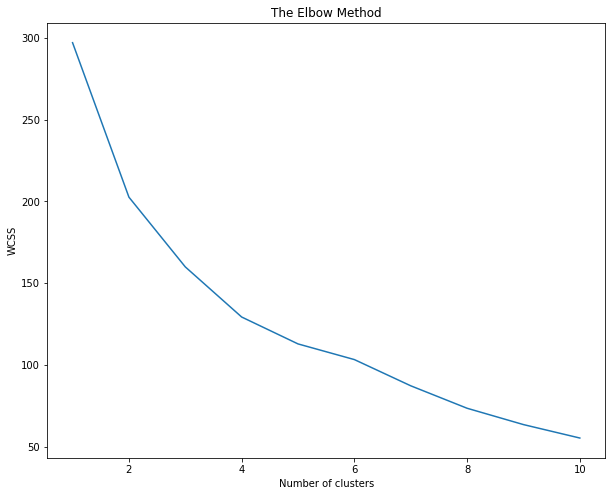

In [105]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above diagram, it is evident that the optimal value of k is 4

In [106]:
X = df_crime_info[['Crime_Rate','Child_Poverty_Rate', 'Work_Benefit_Per', 'Per_Un_Emloyd', 'Lone_Parents','Fund_Red_Per', 'Income_Depr_Per', 'School_Excl_Per','Aff_Housing']]

clusters = KMeans(4)  # 4 clusters!
clusters.fit(X)
clusters.cluster_centers_
clusters.labels_

df_crime_info['Crime_clusters'] = clusters.labels_
df_crime_info.sort_values(by=['Crime_Rate'],ascending = True)
df_crime_info

,Borough,Crime_Rate,Child_Poverty_Rate,Work_Benefit_Per,Per_Un_Emloyd,Lone_Parents,Fund_Red_Per,Income_Depr_Per,School_Excl_Per,Aff_Housing,Crime_clusters
0,Barking and Dagenham,14638.0,36.57,10.0,34.2,8700.0,67.710611,40.4,29.0,59.0,1
1,Barnet,21549.0,26.60,5.9,27.6,9700.0,11.503570,23.2,44.0,320.0,0
2,Bexley,11163.0,24.72,6.5,24.0,7500.0,8.474576,19.7,34.0,69.0,2
3,Brent,23237.0,32.04,7.8,32.5,8800.0,73.542164,39.3,36.0,226.0,0
4,Bromley,17243.0,21.44,6.0,21.0,10000.0,65.928440,17.5,66.0,74.0,1
5,Camden,25390.0,35.18,8.1,29.8,7700.0,24.602860,36.3,30.0,74.0,0
6,Croydon,25777.0,31.17,6.3,22.2,12200.0,0.000000,27.6,40.0,186.0,0
7,Ealing,23684.0,30.06,7.6,24.7,7800.0,59.243760,32.5,78.0,29.0,0
8,Enfield,19401.0,34.06,8.7,29.9,21600.0,60.164927,39.9,48.0,370.0,0
9,Greenwich,20023.0,33.66,8.9,27.0,10200.0,-94.960244,36.3,12.0,474.0,1


### Analysing the data pairwise - 'Crime Rate' & 'Child Poverty Rate'

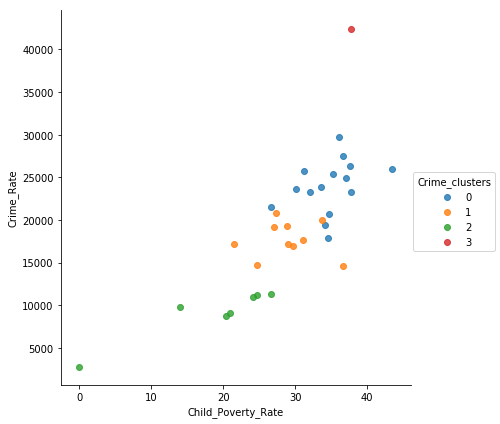

In [107]:
sns.lmplot('Child_Poverty_Rate' ,'Crime_Rate', data=df_crime_info,
        hue = "Crime_clusters",
        fit_reg=False, size = 6 );

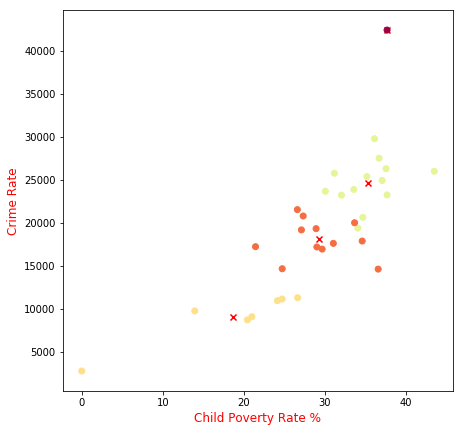

In [108]:
data=X
clusters = KMeans(4);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,1], centers[:,0], marker="x", color='r')
plt.xlabel("Child Poverty Rate %", color ='r', fontsize =12)
plt.ylabel("Crime Rate", color ='r',fontsize =12 )
plt.scatter(data.iloc[:,1],data.iloc[:,0], c=[plt.cm.Spectral(float(i) /5) for i in clusters.labels_]); 
#print(data)
#print(centers)

* There is a clear positive trend between 'Child Poverty Rate' and 'Crime Rate'. Please also 
  note that there is a single member outlier on the cluster. 

### Analysing the data pairwise - 'Crime Rate' & 'Work Benefit Percentage'

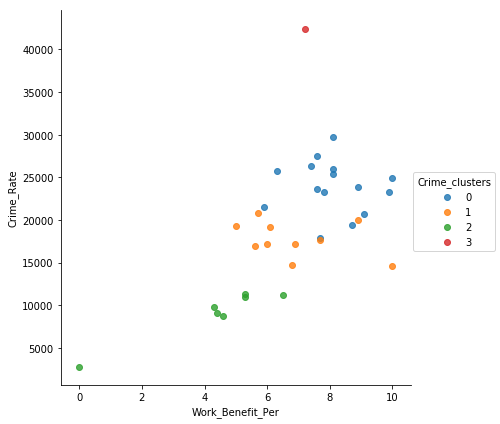

In [109]:
sns.lmplot('Work_Benefit_Per' ,'Crime_Rate', data=df_crime_info,
        hue = "Crime_clusters",
        fit_reg=False, size = 6 );

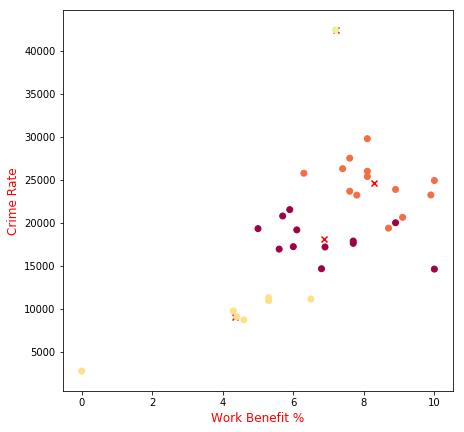

In [110]:
data=X
clusters = KMeans(4);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,2], centers[:,0], marker="x", color='r')
plt.xlabel("Work Benefit %", color ='r', fontsize =12)
plt.ylabel("Crime Rate", color ='r',fontsize =12 )

plt.scatter(data.iloc[:,2],data.iloc[:,0], c=[plt.cm.Spectral(float(i) /5) for i in clusters.labels_]); 
#print(data)
#print(centers)

* There is a clear positive trend between 'Work Benefit Percentage' and 'Crime Rate'. Please 
  also note that there is a single member outlier on the cluster. 

### Analysing the data pairwise - 'Crime Rate' & 'Unemployed Percentage'

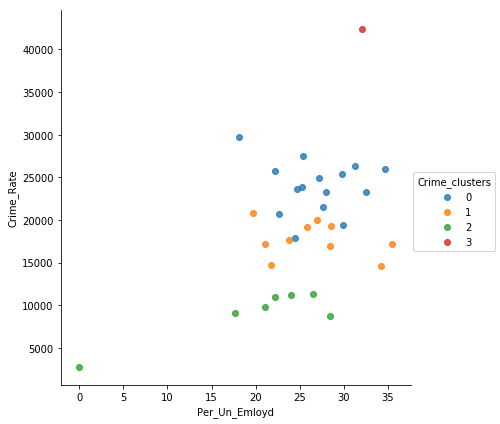

In [111]:
sns.lmplot('Per_Un_Emloyd' ,'Crime_Rate', data=df_crime_info,
        hue = "Crime_clusters",
        fit_reg=False, size = 6 );

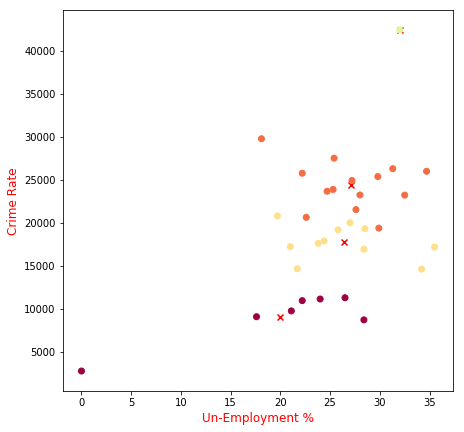

In [112]:
data=X
clusters = KMeans(4);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,3], centers[:,0], marker="x", color='r')
plt.xlabel("Un-Employment %", color ='r', fontsize =12)
plt.ylabel("Crime Rate", color ='r',fontsize =12 )

plt.scatter(data.iloc[:,3],data.iloc[:,0], c=[plt.cm.Spectral(float(i) /5) for i in clusters.labels_]); 

* There is a no clear positive trend between 'Un-employment' and 'Crime Rate'. 

### Analysing the data pairwise - 'Crime Rate' & 'Number of Lone Parents'

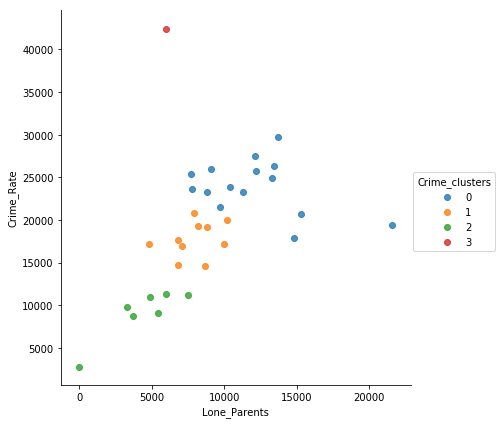

In [113]:
sns.lmplot('Lone_Parents' ,'Crime_Rate', data=df_crime_info,
        hue = "Crime_clusters",
        fit_reg=False, size = 6 );

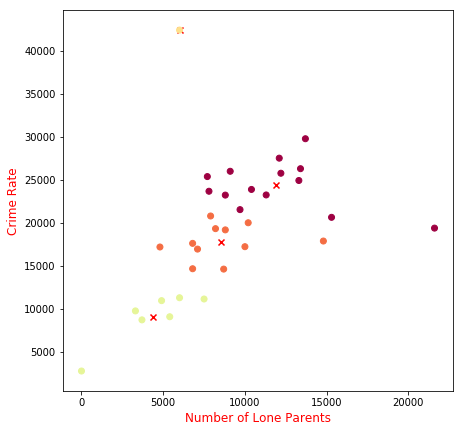

In [114]:
data=X
clusters = KMeans(4);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,4], centers[:,0], marker="x", color='r')
plt.xlabel("Number of Lone Parents", color ='r', fontsize =12)
plt.ylabel("Crime Rate", color ='r',fontsize =12 )

plt.scatter(data.iloc[:,4],data.iloc[:,0], c=[plt.cm.Spectral(float(i) /5) for i in clusters.labels_]); 

* There is a clear positive trend between 'Number of Lone Parents' and 'Crime Rate'. Please 
  note the single value outlier on the graph

### Analysing the data pairwise - 'Crime Rate' & 'Funding Reduction %'

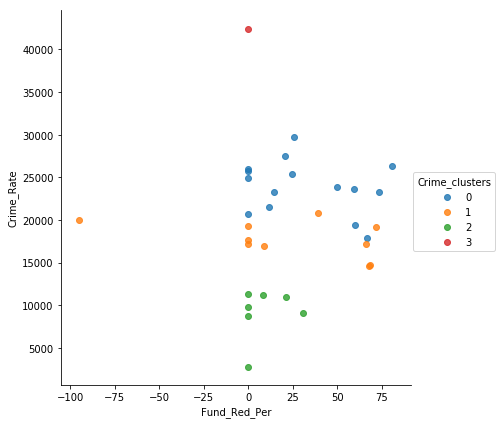

In [115]:
sns.lmplot('Fund_Red_Per' ,'Crime_Rate', data=df_crime_info,
        hue = "Crime_clusters",
        fit_reg=False, size = 6 );

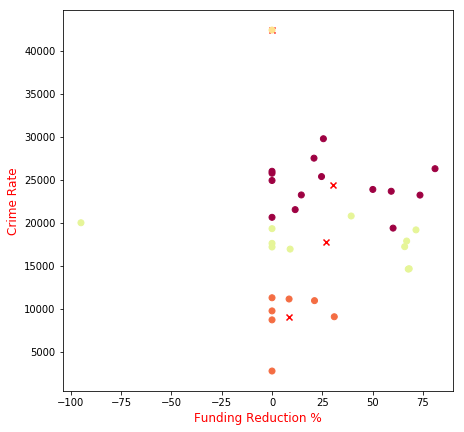

In [116]:
data=X
clusters = KMeans(4);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,5], centers[:,0], marker="x", color='r')
plt.xlabel("Funding Reduction %", color ='r', fontsize =12)
plt.ylabel("Crime Rate", color ='r',fontsize =12 )

plt.scatter(data.iloc[:,5],data.iloc[:,0], c=[plt.cm.Spectral(float(i) /5) for i in clusters.labels_]); 

* There is sharp rise in the crime rate for the initial change in fund reduction, thereafter 
  the trend is flattened. 

### Analysing the data pairwise - 'Crime Rate' & 'Income Deprived Family %'

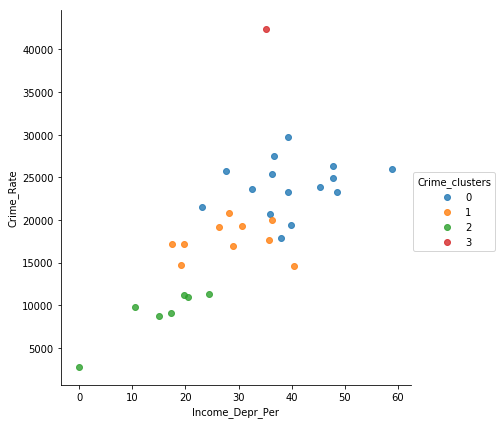

In [117]:
sns.lmplot('Income_Depr_Per' ,'Crime_Rate', data=df_crime_info,
        hue = "Crime_clusters",
        fit_reg=False, size = 6 );

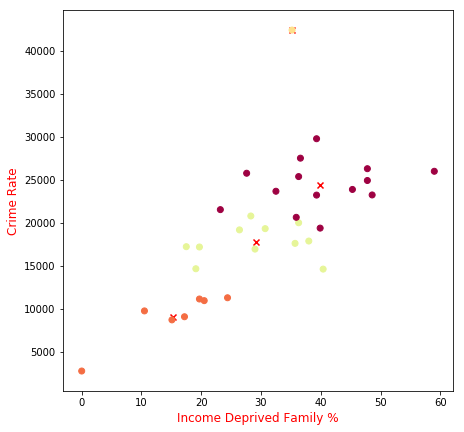

In [118]:
data=X
clusters = KMeans(4);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,6], centers[:,0], marker="x", color='r')
plt.xlabel("Income Deprived Family %", color ='r', fontsize =12)
plt.ylabel("Crime Rate", color ='r',fontsize =12 )

plt.scatter(data.iloc[:,6],data.iloc[:,0], c=[plt.cm.Spectral(float(i) /5) for i in clusters.labels_]); 

* There is clear postive trend between 'Income Deprived Family Percentage' and the 'Crime Rate'.

### Analysing the data pairwise - 'Crime Rate' & 'Permanent Exclusion from School %'

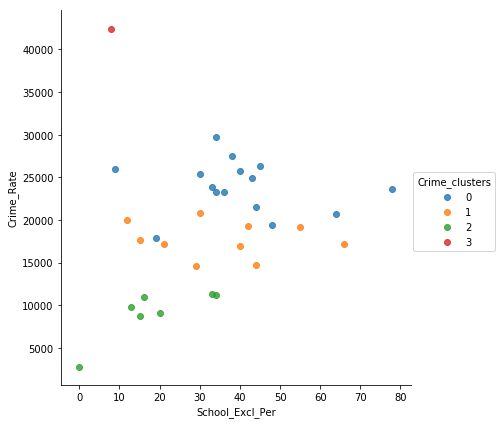

In [119]:
sns.lmplot('School_Excl_Per' ,'Crime_Rate', data=df_crime_info,
        hue = "Crime_clusters",
        fit_reg=False, size = 6 );

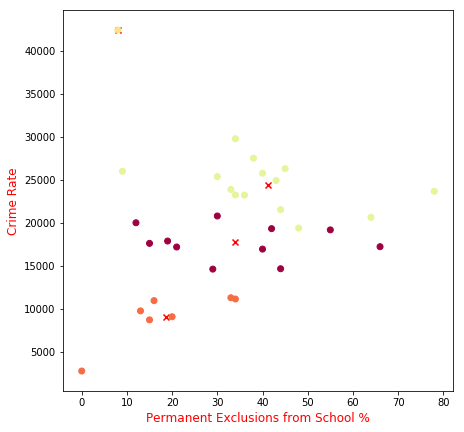

In [120]:
data=X
clusters = KMeans(4);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,7], centers[:,0], marker="x", color='r')
plt.xlabel("Permanent Exclusions from School %", color ='r', fontsize =12)
plt.ylabel("Crime Rate", color ='r',fontsize =12 )

plt.scatter(data.iloc[:,7],data.iloc[:,0], c=[plt.cm.Spectral(float(i) /5) for i in clusters.labels_]); 

* There is average positive trend between 'Permanent exclusions from school' and 'Crime Rate'.

### Analysing the data pairwise - 'Crime Rate' & 'Affordable Housing'

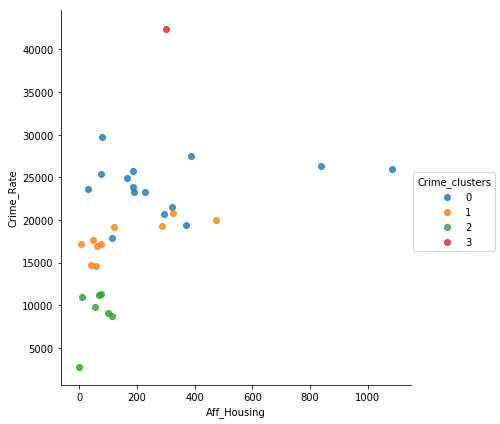

In [121]:
sns.lmplot('Aff_Housing' ,'Crime_Rate', data=df_crime_info,
        hue = "Crime_clusters",
        fit_reg=False, size = 6 );

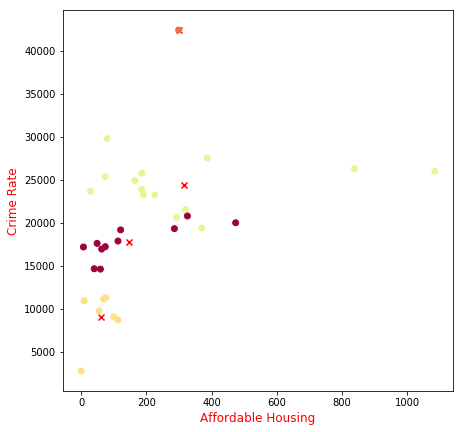

In [122]:
data=X
clusters = KMeans(4);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,8], centers[:,0], marker="x", color='r')
plt.xlabel("Affordable Housing", color ='r', fontsize =12)
plt.ylabel("Crime Rate", color ='r',fontsize =12 )

plt.scatter(data.iloc[:,8],data.iloc[:,0], c=[plt.cm.Spectral(float(i) /5) for i in clusters.labels_]); 

* There is varying positive trend between 'Less Affordable Housing' and 'Crime Rate'.

### Pearson Correlation Analysis 

Here we are veryfying the observation we have made from K-Means analysis 

In [123]:
variables_correlation = df_crime_info
corr = variables_correlation.corr(method ='pearson')
corr

,Crime_Rate,Child_Poverty_Rate,Work_Benefit_Per,Per_Un_Emloyd,Lone_Parents,Fund_Red_Per,Income_Depr_Per,School_Excl_Per,Aff_Housing,Crime_clusters
Crime_Rate,1.000000,0.769093,0.591704,0.457529,0.475792,0.048242,0.691538,0.206605,0.440820,-0.437831
Child_Poverty_Rate,0.769093,1.000000,0.879392,0.726126,0.652583,0.071250,0.924661,0.207639,0.511180,-0.585183
Work_Benefit_Per,0.591704,0.879392,1.000000,0.625896,0.676641,0.105346,0.837710,0.300892,0.270760,-0.609222
Per_Un_Emloyd,0.457529,0.726126,0.625896,1.000000,0.282307,0.065416,0.593898,0.113794,0.383762,-0.255387
Lone_Parents,0.475792,0.652583,0.676641,0.282307,1.000000,0.247358,0.649883,0.487268,0.375904,-0.720777
Fund_Red_Per,0.048242,0.071250,0.105346,0.065416,0.247358,1.000000,0.114891,0.466493,-0.084330,-0.284478
Income_Depr_Per,0.691538,0.924661,0.837710,0.593898,0.649883,0.114891,1.000000,0.151849,0.602294,-0.659001
School_Excl_Per,0.206605,0.207639,0.300892,0.113794,0.487268,0.466493,0.151849,1.000000,-0.059262,-0.498863
Aff_Housing,0.440820,0.511180,0.270760,0.383762,0.375904,-0.084330,0.602294,-0.059262,1.000000,-0.347598
Crime_clusters,-0.437831,-0.585183,-0.609222,-0.255387,-0.720777,-0.284478,-0.659001,-0.498863,-0.347598,1.000000


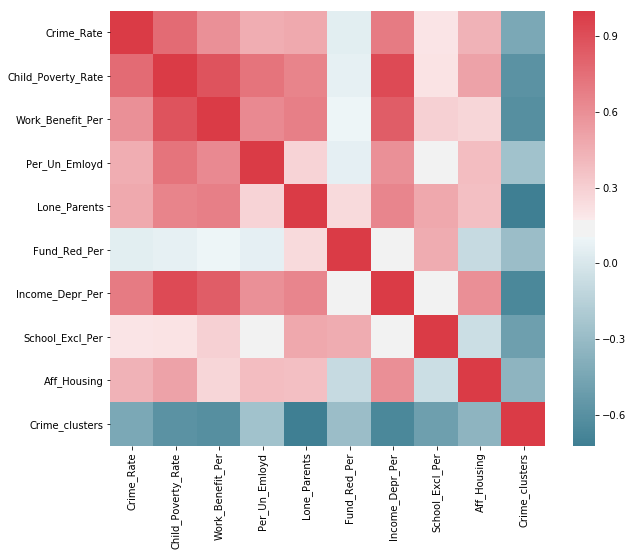

In [124]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
#corr = dataframe.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#### As Obeved in K-Means analysis,  the 'Pearson' correlation also confirms that the following factors have great impact on the crime rate 

    1. Child Poverty Rate 
    2. Income Deprieved families 
    3. Work Benefits
    4. Lone Paents 
    5. Unemployment percentage 

In [125]:
stats = df_crime_info.sort_values("Crime_Rate", ascending=False)
df_final = pd.DataFrame(stats)

df_final.head()

,Borough,Crime_Rate,Child_Poverty_Rate,Work_Benefit_Per,Per_Un_Emloyd,Lone_Parents,Fund_Red_Per,Income_Depr_Per,School_Excl_Per,Aff_Housing,Crime_clusters
32,Westminster,42414.0,37.67,7.2,32.0,6000.0,0.000000,35.2,8.0,299.0,3
21,Lambeth,29787.0,36.12,8.1,18.1,13700.0,25.531915,39.3,34.0,80.0,0
27,Southwark,27529.0,36.68,7.6,25.4,12100.0,20.860602,36.6,38.0,387.0,0
24,Newham,26306.0,37.54,7.4,31.3,13400.0,81.018455,47.8,45.0,839.0,0
29,Tower Hamlets,26005.0,43.49,8.1,34.7,9100.0,0.000000,59.0,9.0,1085.0,0


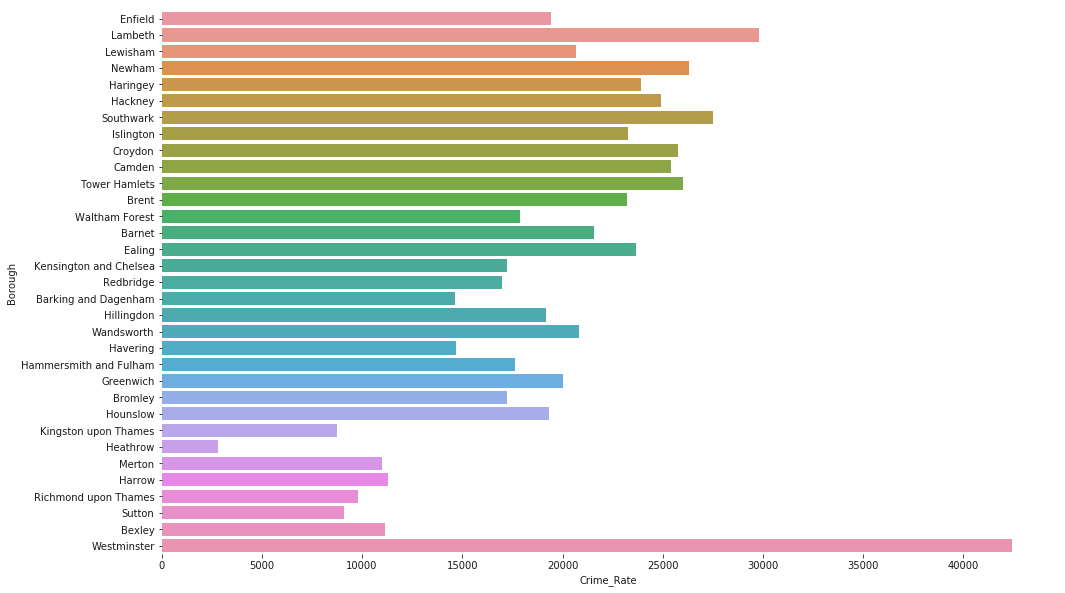

In [126]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))

# Load the dataset
stats = df_crime_info.sort_values([ "Crime_clusters"], ascending=True)
sns.set_color_codes("pastel")
sns.barplot(y="Borough", x="Crime_Rate", data=stats)

sns.despine(left=True, bottom=True)

## Results and Discussion <a name="results"></a>

Both K-Means and Pearson correlation lead us to think that the 5 major factors inpacting the crime rates are 
  
    1. Child Poverty Rate 
    2. Income Deprieved families 
    3. Work Benefits
    4. Lone Paents 
    5. Unemployment percentage
    
Out of the five, the first 2 major factors are directly related to poverty. 

'Child Poverty Rate' has a direct corelation with 
   
    1. Income depprived percnetage 
    2. Work Benefits. 

'Work Benefits' has in turn has a great corelation with 
    
    1. Lone Parents. 
    
 



## Conclusion <a name="conclusion"></a>

Our analysis shows that there are mainly 3 categories of factors which are affecting the crime rates in London Boroughs 

* High Impact  
  
    1. Child Poverty Rate 
    2. Income Deprieved families 
    3. Work Benefits

* Medium Impact 

    1. Lone Paents 
    2. Unemployment percentage
    3. Un-affordable houses 

* Low Impact

    1. Youth fund reduction
    2. School exclusions 
    
    Please note that 'School Exclusions' is only a part of the section of people who discontinue the studies. Detailed analysis on the area is required to find out more evidence on the relationship with crime rates. 